In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load the dataset
data = pd.read_csv('data/stock_price.csv')

Japanese Column	English Translation
日付け	Date
終値	Close
始値	Open
高値	High
安値	Low
出来高	Volume
変化率 %	Change Percentage (%)

In [6]:
# Create a dictionary for renaming columns
column_mapping = {
    '日付け': 'date',
    '終値': 'closing_price',
    '始値': 'opening_price',
    '高値': 'high_price',
    '安値': 'low_price',
    '出来高': 'volume',
    '変化率 %': 'rate_of_change'
}

# Rename the columns
data.rename(columns=column_mapping, inplace=True)

In [8]:
print(data.dtypes)

date               object
closing_price     float64
opening_price     float64
high_price        float64
low_price         float64
volume             object
rate_of_change     object
dtype: object


In [10]:
data.head(15)

,date,closing_price,opening_price,high_price,low_price,volume,rate_of_change
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%
5,2024-07-25,158.1,157.0,159.0,156.8,190.62M,-0.25%
6,2024-07-24,158.5,160.0,160.4,158.4,168.57M,-1.37%
7,2024-07-23,160.7,161.6,161.7,159.8,165.79M,0.50%
8,2024-07-22,159.9,159.5,159.9,157.9,136.12M,0.57%
9,2024-07-19,159.0,160.1,160.9,158.7,166.57M,-1.12%


In [12]:
data.tail()

,date,closing_price,opening_price,high_price,low_price,volume,rate_of_change
9197,1987-02-18,191.2,186.3,191.2,186.3,795.09M,4.82%
9198,1987-02-17,182.4,176.5,184.3,175.5,881.51M,3.93%
9199,1987-02-16,175.5,166.7,175.5,165.7,360.51M,1.74%
9200,1987-02-13,172.5,176.5,176.5,172.5,422.38M,-5.43%
9201,1987-02-12,182.4,182.4,182.4,182.4,1.28B,16.25%


In [14]:
data.isnull().sum()

date              0
closing_price     0
opening_price     0
high_price        0
low_price         0
volume            0
rate_of_change    0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            9202 non-null   object 
 1   closing_price   9202 non-null   float64
 2   opening_price   9202 non-null   float64
 3   high_price      9202 non-null   float64
 4   low_price       9202 non-null   float64
 5   volume          9202 non-null   object 
 6   rate_of_change  9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [18]:
data.describe()

,closing_price,opening_price,high_price,low_price
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


# **Data Cleaning and Preprocessing**

In [21]:
# Convert 'date' column to datetime
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

print(data.dtypes)

date              datetime64[ns]
closing_price            float64
opening_price            float64
high_price               float64
low_price                float64
volume                    object
rate_of_change            object
dtype: object


Clean and Convert **`volume`** Column

In [24]:
# Extract unique suffixes from the 'volume' column
import re

# Function to extract the suffix from a string
def extract_suffix(volume_str):
    match = re.search(r'([A-Za-z]+)$', volume_str)
    if match:
        return match.group(1)
    else:
        return ''

# Apply the function to extract suffixes
data['volume_suffix'] = data['volume'].apply(extract_suffix)

# Get unique suffixes
unique_suffixes = data['volume_suffix'].unique()
print("Unique suffixes in 'volume' column:", unique_suffixes)

Unique suffixes in 'volume' column: ['M' 'B']


In [26]:
# Define the mapping for suffixes to multipliers
suffix_mapping = {
    'M': 1e6,   # Million
    'B': 1e9,   # Billion
}

print("Suffix Mapping:", suffix_mapping)

Suffix Mapping: {'M': 1000000.0, 'B': 1000000000.0}


In [28]:
data.columns

Index(['date', 'closing_price', 'opening_price', 'high_price', 'low_price',
       'volume', 'rate_of_change', 'volume_suffix'],
      dtype='object')

In [30]:
# Function to convert volume strings to float
def convert_volume(volume_str):
    # Use regex to separate the numeric part and the suffix
    match = re.match(r'([\d\.]+)([A-Za-z]*)', volume_str)
    if match:
        number = float(match.group(1))
        suffix = match.group(2)
        if suffix in suffix_mapping:
            return number * suffix_mapping[suffix]
        elif suffix == '':
            return number
        else:
            print(f"Unknown suffix '{suffix}' encountered. Treating as zero.")
            return 0.0
    else:
        print(f"Unable to parse volume string: '{volume_str}'. Treating as zero.")
        return 0.0

# Apply the conversion function to the 'volume' column
data['volume_numeric'] = data['volume'].apply(convert_volume)

# Verify the conversion
print(data[['volume', 'volume_numeric']].head())

    volume  volume_numeric
0   79.15M      79150000.0
1  173.91M     173910000.0
2  138.14M     138140000.0
3  126.28M     126280000.0
4  155.08M     155080000.0


In [32]:
# Verify the conversion
print(data[['volume', 'volume_numeric']].head(20))

     volume  volume_numeric
0    79.15M      79150000.0
1   173.91M     173910000.0
2   138.14M     138140000.0
3   126.28M     126280000.0
4   155.08M     155080000.0
5   190.62M     190620000.0
6   168.57M     168570000.0
7   165.79M     165790000.0
8   136.12M     136120000.0
9   166.57M     166570000.0
10  202.73M     202730000.0
11  181.48M     181480000.0
12  182.23M     182230000.0
13  250.56M     250560000.0
14  228.26M     228260000.0
15  226.57M     226570000.0
16  214.95M     214950000.0
17  250.58M     250580000.0
18  199.50M     199500000.0
19  220.24M     220240000.0


In [34]:
# Verify the first few rows
print(data[['volume','volume_suffix','volume_numeric']].head())

    volume volume_suffix  volume_numeric
0   79.15M             M      79150000.0
1  173.91M             M     173910000.0
2  138.14M             M     138140000.0
3  126.28M             M     126280000.0
4  155.08M             M     155080000.0


In [36]:
print(data.dtypes)

date              datetime64[ns]
closing_price            float64
opening_price            float64
high_price               float64
low_price                float64
volume                    object
rate_of_change            object
volume_suffix             object
volume_numeric           float64
dtype: object


In [38]:
print(data['volume_numeric'].describe())

count    9.202000e+03
mean     1.726677e+08
std      1.251280e+08
min      9.340000e+06
25%      8.073000e+07
50%      1.540150e+08
75%      2.305225e+08
max      1.280000e+09
Name: volume_numeric, dtype: float64


In [40]:
# Drop the temporary 'volume_suffix' column
data.drop('volume_suffix', axis=1, inplace=True)

In [42]:
print(data.columns)

Index(['date', 'closing_price', 'opening_price', 'high_price', 'low_price',
       'volume', 'rate_of_change', 'volume_numeric'],
      dtype='object')


Convert **`rate_of_change`** to Numerical Values




In [46]:
# Remove the '%' sign and convert to float
data['rate_of_change'] = data['rate_of_change'].str.replace('%', '').astype(float)

# Verify the conversion
print(data[['rate_of_change']].head())
print(data.dtypes)

   rate_of_change
0           -2.56
1            1.07
2           -0.63
3            1.14
4           -0.13
date              datetime64[ns]
closing_price            float64
opening_price            float64
high_price               float64
low_price                float64
volume                    object
rate_of_change           float64
volume_numeric           float64
dtype: object


Set **`date`** as the DataFrame Index

In [51]:
# Set 'date' as the index
data.set_index('date', inplace=True)

print(data.index)

DatetimeIndex(['2024-08-01', '2024-07-31', '2024-07-30', '2024-07-29',
               '2024-07-26', '2024-07-25', '2024-07-24', '2024-07-23',
               '2024-07-22', '2024-07-19',
               ...
               '1987-02-25', '1987-02-24', '1987-02-23', '1987-02-20',
               '1987-02-19', '1987-02-18', '1987-02-17', '1987-02-16',
               '1987-02-13', '1987-02-12'],
              dtype='datetime64[ns]', name='date', length=9202, freq=None)


# **Further Exploratory Data Analysis (EDA)**

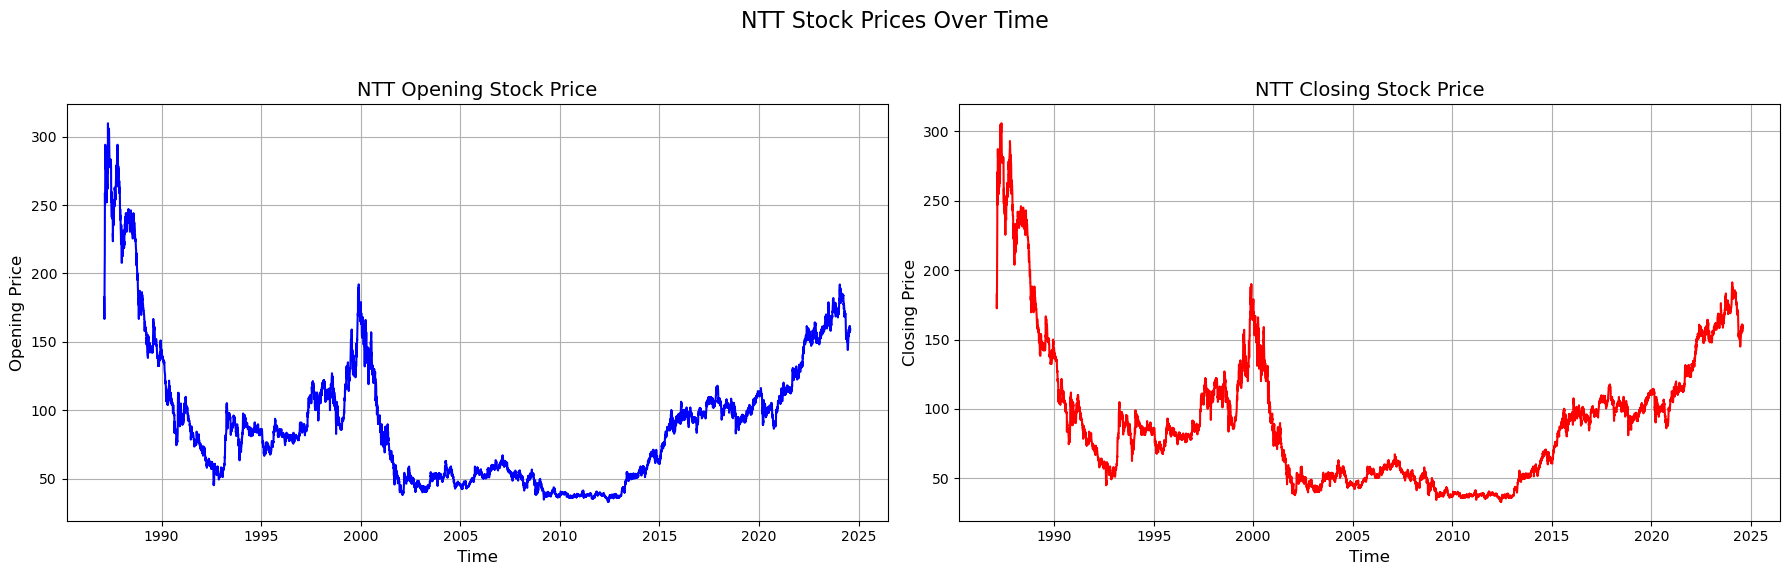

In [54]:
# Ensure the data is sorted by date in ascending order
data_sorted = data.sort_index()
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(18, 6))

# Plot Opening Price
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(data_sorted.index, data_sorted['opening_price'], color='blue')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Opening Price", fontsize=12)
plt.title("NTT Opening Stock Price", fontsize=14)
plt.grid(True)

# Plot Closing Price
plt.subplot(1, 2, 2)
plt.plot(data_sorted.index, data_sorted['closing_price'], color='red')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.title("NTT Closing Stock Price", fontsize=14)
plt.grid(True)

# Add a super title for the entire figure
plt.suptitle("NTT Stock Prices Over Time", fontsize=16)

# Improve layout and display the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  
plt.show()


The previous charts depict significant fluctuations in NTT's stock prices over time, with notable periods of decline, especially around the 1990s and early 2000s, followed by a gradual recovery. However, in the last five years, there's a sharp upward trend in both opening and closing prices, reflecting a distinct shift in the stock's performance.

This suggests that older data, especially from the earlier years, may no longer be as relevant for predicting future stock movements. The earlier volatility and downward trends might reflect a different economic environment or company conditions that no longer apply.

Given this, we will focus our analysis on the most recent five years of data, as it is more reflective of the current market dynamics and likely provides more reliable indicators for forecasting future trends. By narrowing our analysis to this period, we can generate more accurate predictions and insights into the stock's behavior moving forward.

Analyze the Difference Between Opening and Closing Prices

In [58]:
# Calculate the difference between Closing and Opening prices
data_sorted['price_difference'] = data_sorted['closing_price'] - data_sorted['opening_price']

In [60]:
# Define the cutoff date for five years ago from the current date (assuming current date is 2024-10-11)
cutoff_date = pd.to_datetime('2019-10-11')

# Select stock price records for the last five years
data_5years = data[data.index >= cutoff_date]

# Check filtered data shape
print(f"Filtered Data Shape (Last 5 Years): {data_5years.shape}")


Filtered Data Shape (Last 5 Years): (1174, 7)


In [62]:
# Display the first few rows of the filtered data
print(data_5years.head())

            closing_price  opening_price  high_price  low_price   volume  \
date                                                                       
2024-08-01          156.3          159.3       159.4      156.1   79.15M   
2024-07-31          160.4          158.2       160.7      158.1  173.91M   
2024-07-30          158.7          158.8       159.2      158.0  138.14M   
2024-07-29          159.7          158.7       160.2      158.4  126.28M   
2024-07-26          157.9          159.3       159.6      157.9  155.08M   

            rate_of_change  volume_numeric  
date                                        
2024-08-01           -2.56      79150000.0  
2024-07-31            1.07     173910000.0  
2024-07-30           -0.63     138140000.0  
2024-07-29            1.14     126280000.0  
2024-07-26           -0.13     155080000.0  


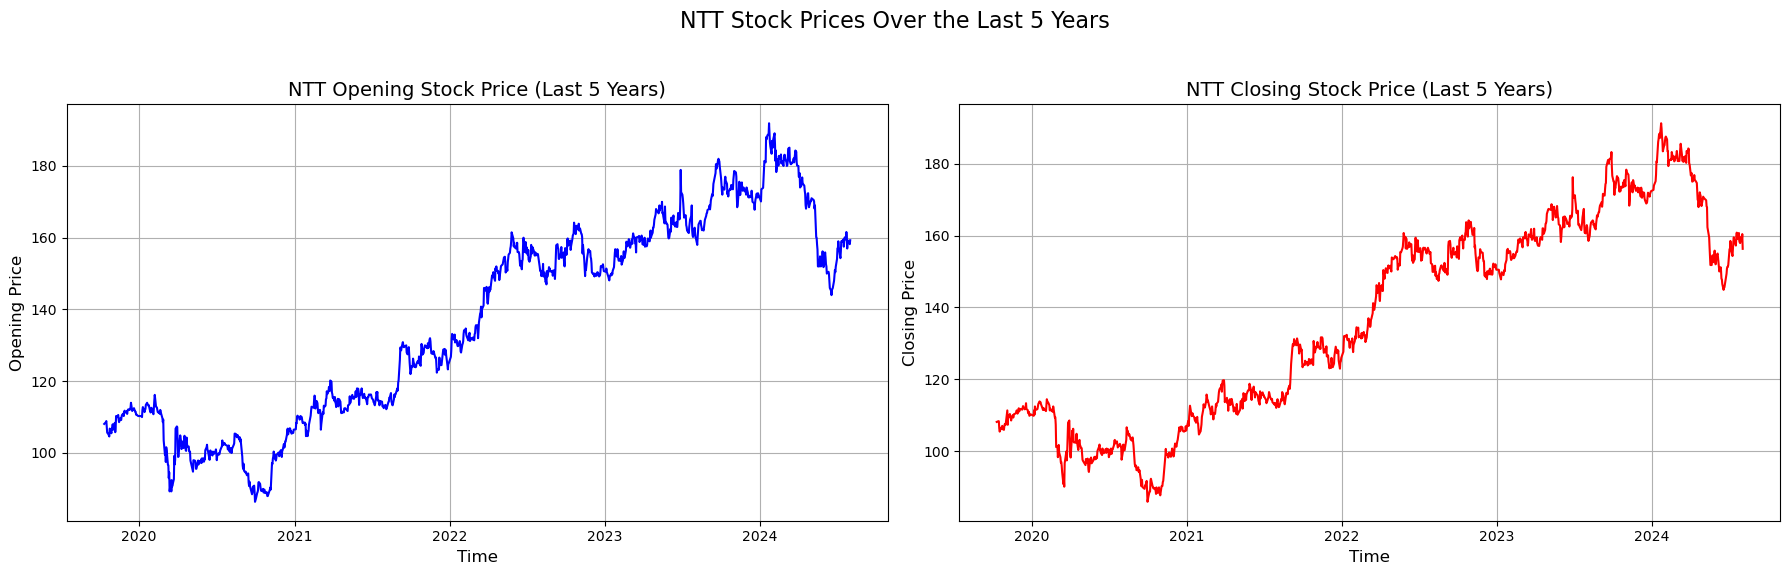

In [64]:
# Set the figure size for better readability
plt.figure(figsize=(18, 6))

# Plot Opening Price
plt.subplot(1, 2, 1)  # (rows, columns, panel number)
plt.plot(data_5years.index, data_5years['opening_price'], color='blue')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Opening Price", fontsize=12)
plt.title("NTT Opening Stock Price (Last 5 Years)", fontsize=14)
plt.grid(True)

# Plot Closing Price
plt.subplot(1, 2, 2)
plt.plot(data_5years.index, data_5years['closing_price'], color='red')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Closing Price", fontsize=12)
plt.title("NTT Closing Stock Price (Last 5 Years)", fontsize=14)
plt.grid(True)

# Add a super title for the entire figure
plt.suptitle("NTT Stock Prices Over the Last 5 Years", fontsize=16)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

The recent charts highlight a clear upward trend in NTT's stock performance over the past five years, with both opening and closing prices showing steady growth, particularly after 2020. While there are periods of significant decline, such as in early 2021 and between mid-2023 and 2024, these seem to be short-lived corrections rather than prolonged downtrends. Volatility is apparent in certain phases, notably in 2020 and 2023, suggesting heightened market reactions during these periods. However, from 2021 to 2022, we observe a more stable, consistent rise, indicating investor confidence during this period. The opening and closing prices move in close alignment, reflecting consistent daily sentiment, although some divergence is noticeable during more volatile periods. These fluctuations could point to key events or market news influencing short-term price differences. Going forward, we should focus on analyzing these volatile periods to uncover potential causes and consider how such patterns might inform future predictions.

In [67]:
# Calculate the daily price difference (Closing Price - Opening Price)
data_5years['price_difference'] = data_5years['closing_price'] - data_5years['opening_price']

# Display the first few rows to verify the calculation
print(data_5years[['closing_price', 'opening_price', 'price_difference']].head())

            closing_price  opening_price  price_difference
date                                                      
2024-08-01          156.3          159.3              -3.0
2024-07-31          160.4          158.2               2.2
2024-07-30          158.7          158.8              -0.1
2024-07-29          159.7          158.7               1.0
2024-07-26          157.9          159.3              -1.4


/var/folders/8r/60dc_mcs2yv6x79fk_304hfw0000gn/T/ipykernel_73723/3055818230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_5years['price_difference'] = data_5years['closing_price'] - data_5years['opening_price']


Plotting the Daily Price Differences Over Time

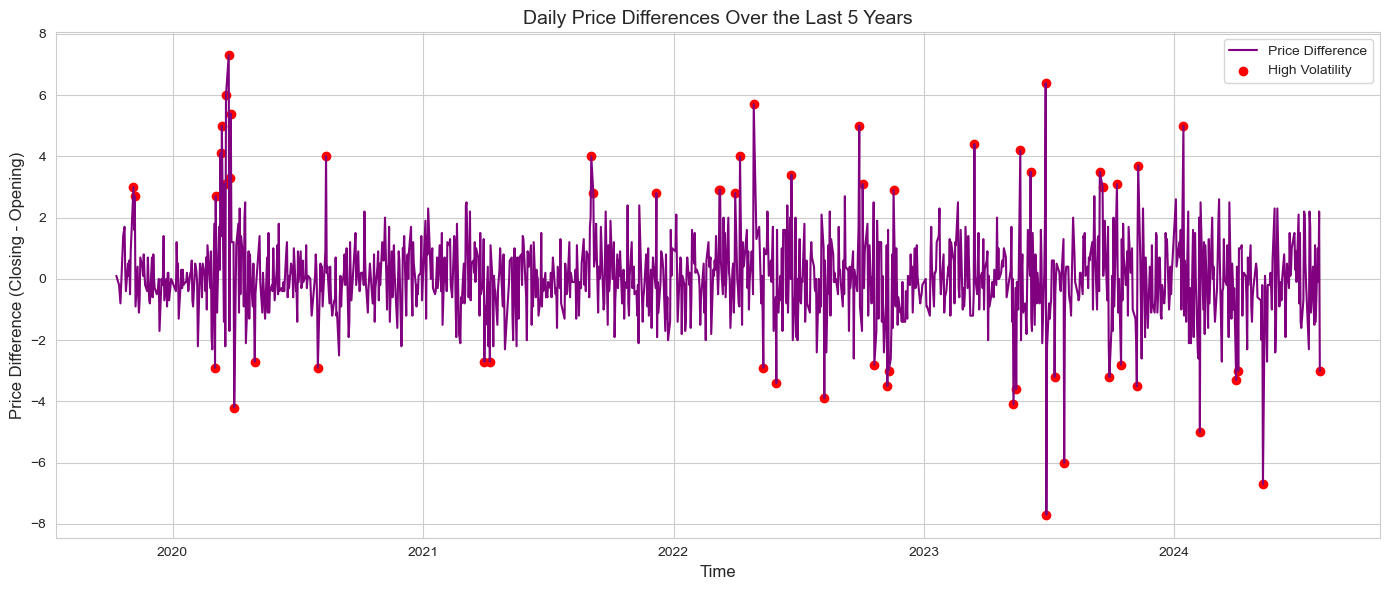

In [70]:
# Set the plot style for better aesthetics
sns.set_style('whitegrid')

plt.figure(figsize=(14, 6))

# Plot the price differences
plt.plot(data_5years.index, data_5years['price_difference'], color='purple', label='Price Difference')

# Highlight periods of significant volatility
threshold = data_5years['price_difference'].abs().quantile(0.95)
high_volatility = data_5years['price_difference'].abs() > threshold

# Scatter plot for high volatility days
plt.scatter(data_5years.index[high_volatility], data_5years['price_difference'][high_volatility],
            color='red', label='High Volatility', marker='o')

# Add labels and title
plt.xlabel("Time", fontsize=12)
plt.ylabel("Price Difference (Closing - Opening)", fontsize=12)
plt.title("Daily Price Differences Over the Last 5 Years", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

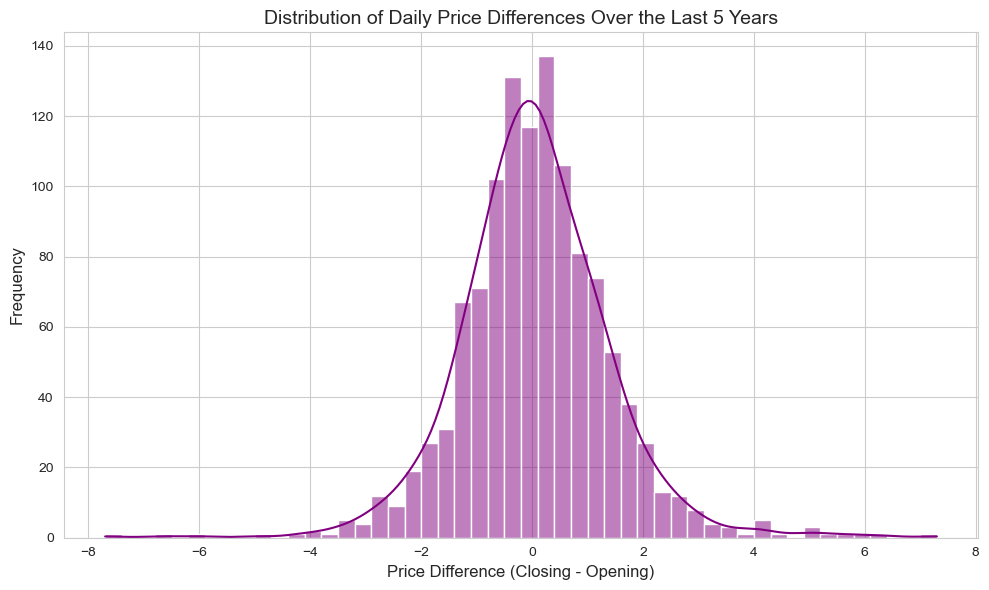

In [72]:
plt.figure(figsize=(10, 6))

# Plot histogram with KDE
sns.histplot(data_5years['price_difference'], bins=50, kde=True, color='purple')

# Add labels and title
plt.xlabel("Price Difference (Closing - Opening)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Distribution of Daily Price Differences Over the Last 5 Years", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

The charts highlight that NTT’s daily price differences are generally small, with most fluctuations hovering around zero, indicating minimal variation between opening and closing prices on most days. However, certain periods, particularly between 2020 and 2021, show significant volatility, with large intra-day movements marked by spikes. These volatile days stand out against the more stable periods, suggesting key events or market reactions during those times. Additionally, the distribution of these differences shows a slight skew towards negative values, meaning that while large deviations are rare, the closing price tends to drop more often than it rises significantly. Understanding these fluctuations will be important in predicting future trends and recognizing market patterns.

Identify and Investigate High Volatility Days

In [76]:
# Calculate the 95th percentile of absolute price differences
volatility_threshold = data_5years['price_difference'].abs().quantile(0.95)
print(f"Volatility Threshold (95th Percentile): {volatility_threshold}")

Volatility Threshold (95th Percentile): 2.6999999999999886


In [78]:
# Identify high volatility days
high_volatility_days = data_5years[data_5years['price_difference'].abs() > volatility_threshold]

# Display the number of high volatility days
print(f"Number of High Volatility Days (Top 5%): {high_volatility_days.shape[0]}")

# Display the high volatility days
print(high_volatility_days[['closing_price', 'opening_price', 'price_difference']])

Number of High Volatility Days (Top 5%): 57
            closing_price  opening_price  price_difference
date                                                      
2024-08-01          156.3          159.3              -3.0
2024-05-10          162.3          169.0              -6.7
2024-04-04          175.0          178.0              -3.0
2024-04-01          176.7          180.0              -3.3
2024-02-08          179.3          184.3              -5.0
2024-01-15          186.0          181.0               5.0
2023-11-10          172.8          169.1               3.7
2023-11-08          168.3          171.8              -3.5
2023-10-16          172.2          175.0              -2.8
2023-10-10          176.5          173.4               3.1
2023-09-29          176.6          179.8              -3.2
2023-09-19          181.0          178.0               3.0
2023-09-15          179.1          175.6               3.5
2023-07-25          163.0          169.0              -6.0
2023-07-11  

In [82]:
# Extract high volatility dates
high_volatility_dates = high_volatility_days.index.strftime('%Y-%m-%d').tolist()

# Display the list of dates
print("High Volatility Dates:")
for date in high_volatility_dates:
    print(date)


High Volatility Dates:
2024-08-01
2024-05-10
2024-04-04
2024-04-01
2024-02-08
2024-01-15
2023-11-10
2023-11-08
2023-10-16
2023-10-10
2023-09-29
2023-09-19
2023-09-15
2023-07-25
2023-07-11
2023-06-29
2023-06-28
2023-06-06
2023-05-22
2023-05-16
2023-05-12
2023-03-16
2022-11-18
2022-11-11
2022-11-09
2022-10-21
2022-10-04
2022-09-29
2022-08-09
2022-06-22
2022-05-31
2022-05-12
2022-04-28
2022-04-08
2022-04-01
2022-03-10
2022-03-09
2021-12-07
2021-09-06
2021-09-03
2021-04-08
2021-03-31
2020-08-12
2020-07-31
2020-04-30
2020-03-31
2020-03-26
2020-03-25
2020-03-23
2020-03-19
2020-03-17
2020-03-13
2020-03-11
2020-03-04
2020-03-03
2019-11-07
2019-11-05


The analysis reveals that NTT experienced notable fluctuations in stock prices, particularly during high volatility periods where price differences exceeded the 95th percentile threshold of 2.7. These volatile days, concentrated around 2020, mid-2023, and early 2024, suggest that significant market events or company-specific factors may have caused sharp price movements. Many of these high volatility days saw negative price differences, indicating that closing prices were often lower than opening prices, possibly reflecting negative market sentiment or reactions to unfavorable news.

## **Data Preprocessing**

Feature Engineering Focused on EDA Insights

In [88]:
# Define the feature columns you want to use
features = ['opening_price', 'high_price', 'low_price', 'volume_numeric', 'rate_of_change']

# Define start and end time for each period
train_end_date = pd.to_datetime("2023-06-30")
validate_start_date = pd.to_datetime("2023-07-01")
validate_end_date = pd.to_datetime("2023-12-31")
test_start_date = pd.to_datetime("2024-01-01")
test_end_date = pd.to_datetime("2024-02-29")

# Split dataset into training, validation, and testing sets
data_train = data_5years[data_5years.index <= train_end_date][features]
data_train_dates = data_5years[data_5years.index <= train_end_date].index

data_validate = data_5years[(data_5years.index >= validate_start_date) & 
                                  (data_5years.index <= validate_end_date)][features]
data_validate_dates = data_5years[(data_5years.index >= validate_start_date) & 
                                        (data_5years.index <= validate_end_date)].index

data_test = data_5years[(data_5years.index >= test_start_date) & 
                              (data_5years.index <= test_end_date)][features]
data_test_dates = data_5years[(data_5years.index >= test_start_date) & 
                                    (data_5years.index <= test_end_date)].index

# Verify the shapes of each dataset
print(f"Training data shape: {data_train.shape}")
print(f"Validation data shape: {data_validate.shape}")
print(f"Testing data shape: {data_test.shape}")


Training data shape: (907, 5)
Validation data shape: (124, 5)
Testing data shape: (38, 5)


In [90]:
# Display a summary of each dataset
print("Training Dataset:")
print(data_train.head())
print("Validation Dataset:")
print(data_validate.head())
print("Testing Dataset:")
print(data_test.head())

Training Dataset:
            opening_price  high_price  low_price  volume_numeric  \
date                                                               
2023-06-30          172.7       172.7      167.5     224330000.0   
2023-06-29          178.9       178.9      169.0     264060000.0   
2023-06-28          169.8       177.1      169.6     537090000.0   
2023-06-27          165.4       168.0      165.1     201980000.0   
2023-06-26          165.1       166.6      164.3     174240000.0   

            rate_of_change  
date                        
2023-06-30           -0.41  
2023-06-29           -2.84  
2023-06-28            5.23  
2023-06-27            1.31  
2023-06-26            0.29  
Validation Dataset:
            opening_price  high_price  low_price  volume_numeric  \
date                                                               
2023-12-29          172.1       173.4      170.9     147770000.0   
2023-12-28          172.4       173.9      171.5     116890000.0   
2023-12-27

In [92]:
# Check for missing values in the training set features
print("Missing Values in Training Features:")
print(data_train.isnull().sum())

# Check for missing values in the validation set features
print("\nMissing Values in Validation Features:")
print(data_validate.isnull().sum())

# Check for missing values in the test set features
print("\nMissing Values in Testing Features:")
print(data_test.isnull().sum())



Missing Values in Training Features:
opening_price     0
high_price        0
low_price         0
volume_numeric    0
rate_of_change    0
dtype: int64

Missing Values in Validation Features:
opening_price     0
high_price        0
low_price         0
volume_numeric    0
rate_of_change    0
dtype: int64

Missing Values in Testing Features:
opening_price     0
high_price        0
low_price         0
volume_numeric    0
rate_of_change    0
dtype: int64


In [94]:
print(data_train.dtypes)

opening_price     float64
high_price        float64
low_price         float64
volume_numeric    float64
rate_of_change    float64
dtype: object


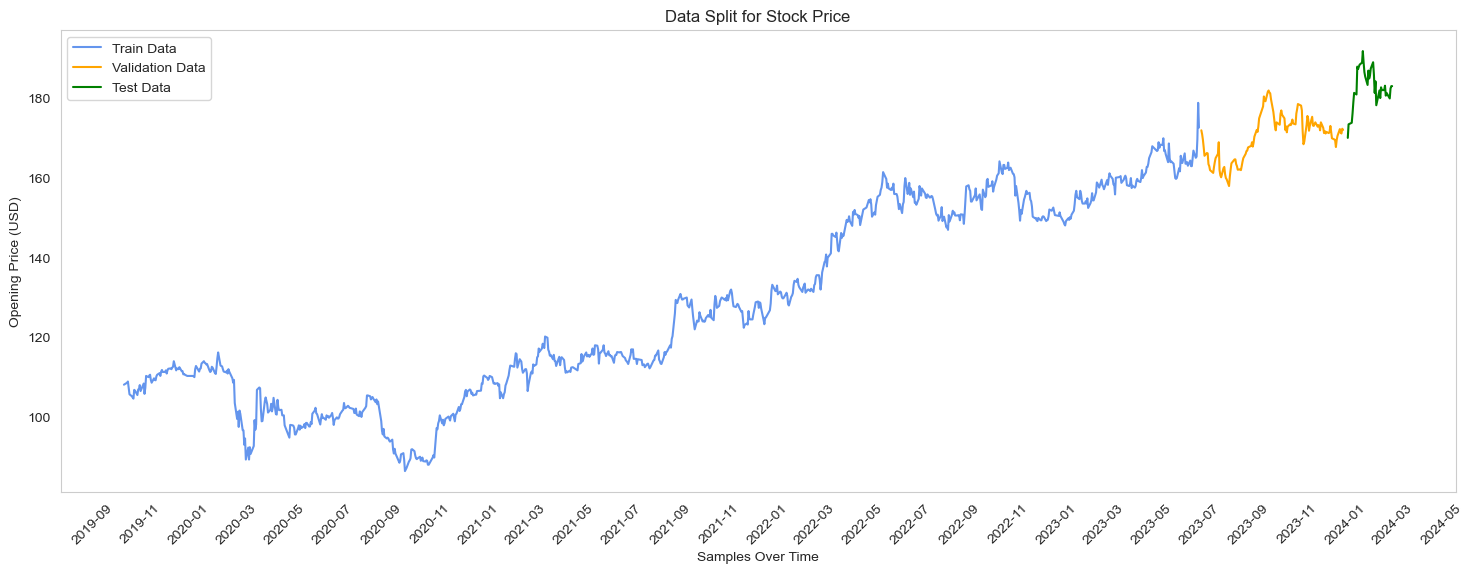

In [96]:
import matplotlib.dates as mdates
# Plot stock prices for each data split
plt.figure(figsize=(18, 6))

# Plot the 'opening_price' for each dataset
plt.plot(data_train_dates, data_train['opening_price'], color='cornflowerblue')
plt.plot(data_validate_dates, data_validate['opening_price'], color='orange')
plt.plot(data_test_dates, data_test['opening_price'], color='green')

# Add legend, title, and labels
plt.legend(["Train Data", "Validation Data", "Test Data"])
plt.title("Data Split for Stock Price")
plt.xlabel("Samples Over Time")
plt.ylabel("Opening Price (USD)")

# Format the x-axis to show dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45)
plt.grid()

# Show the plot
plt.show()

# **Feature Scaling**

In [99]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

# Separate scaler for the target ('opening_price') and features
scaler_features = MinMaxScaler(feature_range=(0, 1))
scaler_target = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the training set for features and target separately
features = ['opening_price', 'high_price', 'low_price', 'volume_numeric', 'rate_of_change']
target = ['opening_price']

# Fit on the training data features and transform (do not fit on validation and test)
data_train_scaled_features = scaler_features.fit_transform(data_train[features])
data_validate_scaled_features = scaler_features.transform(data_validate[features])
data_test_scaled_features = scaler_features.transform(data_test[features])

# Scale the target variable (opening_price) for train, validation, and test sets
data_train_scaled_target = scaler_target.fit_transform(data_train[target])
data_validate_scaled_target = scaler_target.transform(data_validate[target])
data_test_scaled_target = scaler_target.transform(data_test[target])

# Re-attach the dates to each scaled dataframe (Optional)
data_train_scaled_final = pd.DataFrame(data_train_scaled_features, columns=features, index=data_train_dates)
data_validate_scaled_final = pd.DataFrame(data_validate_scaled_features, columns=features, index=data_validate_dates)
data_test_scaled_final = pd.DataFrame(data_test_scaled_features, columns=features, index=data_test_dates)

# Verify that the scaling worked correctly
print("Scaled Training Data (features):\n", data_train_scaled_final.head())
print("Scaled Target (opening_price):\n", data_train_scaled_target[:5])


Scaled Training Data (features):
             opening_price  high_price  low_price  volume_numeric  \
date                                                               
2023-06-30       0.932973    0.931718   0.975148        0.224886   
2023-06-29       1.000000    1.000000   0.992899        0.272984   
2023-06-28       0.901622    0.980176   1.000000        0.603520   
2023-06-27       0.854054    0.879956   0.946746        0.197828   
2023-06-26       0.850811    0.864537   0.937278        0.164245   

            rate_of_change  
date                        
2023-06-30        0.412943  
2023-06-29        0.225732  
2023-06-28        0.847458  
2023-06-27        0.545455  
2023-06-26        0.466872  
Scaled Target (opening_price):
 [[0.93297297]
 [1.        ]
 [0.90162162]
 [0.85405405]
 [0.85081081]]


In [101]:
# Ensure the 'Date' column is in datetime format
data_train_dates = data_train.index
data_validate_dates = data_validate.index
data_test_dates = data_test.index

# Extract features for LSTM input (you can adjust the features as needed)
features = ['opening_price', 'high_price', 'low_price', 'volume_numeric', 'rate_of_change']

# Extract scaled feature values for each dataset
data_train_scaled = data_train[features].values
data_validate_scaled = data_validate[features].values
data_test_scaled = data_test[features].values


## **LSTM Training** 

# Preparing Data for LSTM

In [107]:
# Construct the LSTM data based on the feature set and the target variable
def construct_lstm_data(data, target, sequence_size):
    data_X, data_y = [], []
    for i in range(sequence_size, len(data)):
        data_X.append(data[i-sequence_size:i])  # Past sequence for LSTM
        data_y.append(target[i])  # The target opening price
    return np.array(data_X), np.array(data_y)

# Define the sequence size (look-back period)
sequence_size = 30  # Example: last 30 days

# Construct LSTM data for training, validation, and test sets
X_train_lstm, y_train_lstm = construct_lstm_data(data_train_scaled_features, data_train_scaled_target, sequence_size)
X_val_lstm, y_val_lstm = construct_lstm_data(data_validate_scaled_features, data_validate_scaled_target, sequence_size)
X_test_lstm, y_test_lstm = construct_lstm_data(data_test_scaled_features, data_test_scaled_target, sequence_size)

# Verify the shapes
print(f"LSTM Training Data Shape: {X_train_lstm.shape}")
print(f"LSTM Training Targets Shape: {y_train_lstm.shape}")
print(f"LSTM Validation Data Shape: {X_val_lstm.shape}")
print(f"LSTM Validation Targets Shape: {y_val_lstm.shape}")
print(f"LSTM Test Data Shape: {X_test_lstm.shape}")
print(f"LSTM Test Targets Shape: {y_test_lstm.shape}")


LSTM Training Data Shape: (877, 30, 5)
LSTM Training Targets Shape: (877, 1)
LSTM Validation Data Shape: (94, 30, 5)
LSTM Validation Targets Shape: (94, 1)
LSTM Test Data Shape: (8, 30, 5)
LSTM Test Targets Shape: (8, 1)


In [109]:
# Combine scaled feature datasets all together (training, validation, and test)
data_all_scaled_features = np.concatenate([data_train_scaled_features, data_validate_scaled_features, data_test_scaled_features], axis=0)

# Combine scaled target datasets all together (for training, validation, and test)
data_all_scaled_target = np.concatenate([data_train_scaled_target, data_validate_scaled_target, data_test_scaled_target], axis=0)

# Calculate sizes for each split
train_size = len(data_train_scaled_features)
validate_size = len(data_validate_scaled_features)
test_size = len(data_test_scaled_features)

# Define the sequence size (look-back period)
sequence_size = 60  # Example: last 60 days

# Construct the training dataset (features and targets)
X_train, y_train = construct_lstm_data(data_train_scaled_features, data_train_scaled_target, sequence_size)

# Construct the validation dataset (using the last part of the training data for continuity)
X_validate, y_validate = construct_lstm_data(data_all_scaled_features[train_size-sequence_size:train_size+validate_size, :],
                                             data_all_scaled_target[train_size-sequence_size:train_size+validate_size],
                                             sequence_size)

# Construct the testing dataset (using the last part of validation data for continuity)
X_test, y_test = construct_lstm_data(data_all_scaled_features[-(test_size+sequence_size):, :],
                                     data_all_scaled_target[-(test_size+sequence_size):],
                                     sequence_size)

# Check the shapes of the constructed datasets
print(f"Full Scaled Features Data: {data_all_scaled_features.shape}")
print(f"Full Scaled Target Data: {data_all_scaled_target.shape}")

print(f"\n Data Train Scaled: {data_train_scaled_features.shape}")
print(f"> Data Train X: {X_train.shape}")
print(f"> Data Train y: {y_train.shape}")

print(f"\n Data Validate Scaled: {data_validate_scaled_features.shape}")
print(f"> Data Validate X: {X_validate.shape}")
print(f"> Data Validate y: {y_validate.shape}")

print(f"\n Data Test Scaled: {data_test_scaled_features.shape}")
print(f"> Data Test X: {X_test.shape}")
print(f"> Data Test y: {y_test.shape}")


Full Scaled Features Data: (1069, 5)
Full Scaled Target Data: (1069, 1)

 Data Train Scaled: (907, 5)
> Data Train X: (847, 60, 5)
> Data Train y: (847, 1)

 Data Validate Scaled: (124, 5)
> Data Validate X: (124, 60, 5)
> Data Validate y: (124, 1)

 Data Test Scaled: (38, 5)
> Data Test X: (38, 60, 5)
> Data Test y: (38, 1)


In [ ]:
!pip install tensorflow
import tensorflow as tf
print(tf.__version__)


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.5 MB/s eta 0:00:00ta 0:00:01
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━ 103.9/236.3 MB 108.5 kB/s eta 0:20:21

In [ ]:
# Retrain the model with the best parameters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Initialize the LSTM model
regressor = Sequential()

# Add input layer (X_train.shape[1] is the sequence size, X_train.shape[2] is the number of features)
regressor.add(Input(shape=(X_train.shape[1], X_train.shape[2])))

# Add LSTM layers with the best parameters
regressor.add(LSTM(units=30, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(rate=0.4))

regressor.add(LSTM(units=30, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(rate=0.4))

regressor.add(LSTM(units=30, return_sequences=True, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(rate=0.4))

regressor.add(LSTM(units=30, kernel_regularizer=l2(0.01)))
regressor.add(Dropout(rate=0.4))

# Add output layer (Dense layer with 1 unit to predict one value at a time)
regressor.add(Dense(units=1))

# Compile the model with the best learning rate
regressor.compile(optimizer=Adam(learning_rate=0.0003), loss='mean_squared_error')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Train the model with early stopping
history = regressor.fit(
    X_train, y_train,
    validation_data=(X_validate, y_validate),
    epochs=400,
    batch_size=30,  # Use the same batch size as before
    callbacks=[early_stopping],
    verbose=2
)

# Visualize the training and validation loss over the epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("LSTM Training and Validation Loss with Best Hyperparameters")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


